In [4]:
# opXRD: How to load the database

from opxrd import OpXRD
from xrdpattern.pattern import PatternDB

opxrd_location = '/tmp/opxrd'

- Loading patterns from local files


100% (22041 of 22041) |##################| Elapsed Time: 0:00:52 Time:  0:00:520004


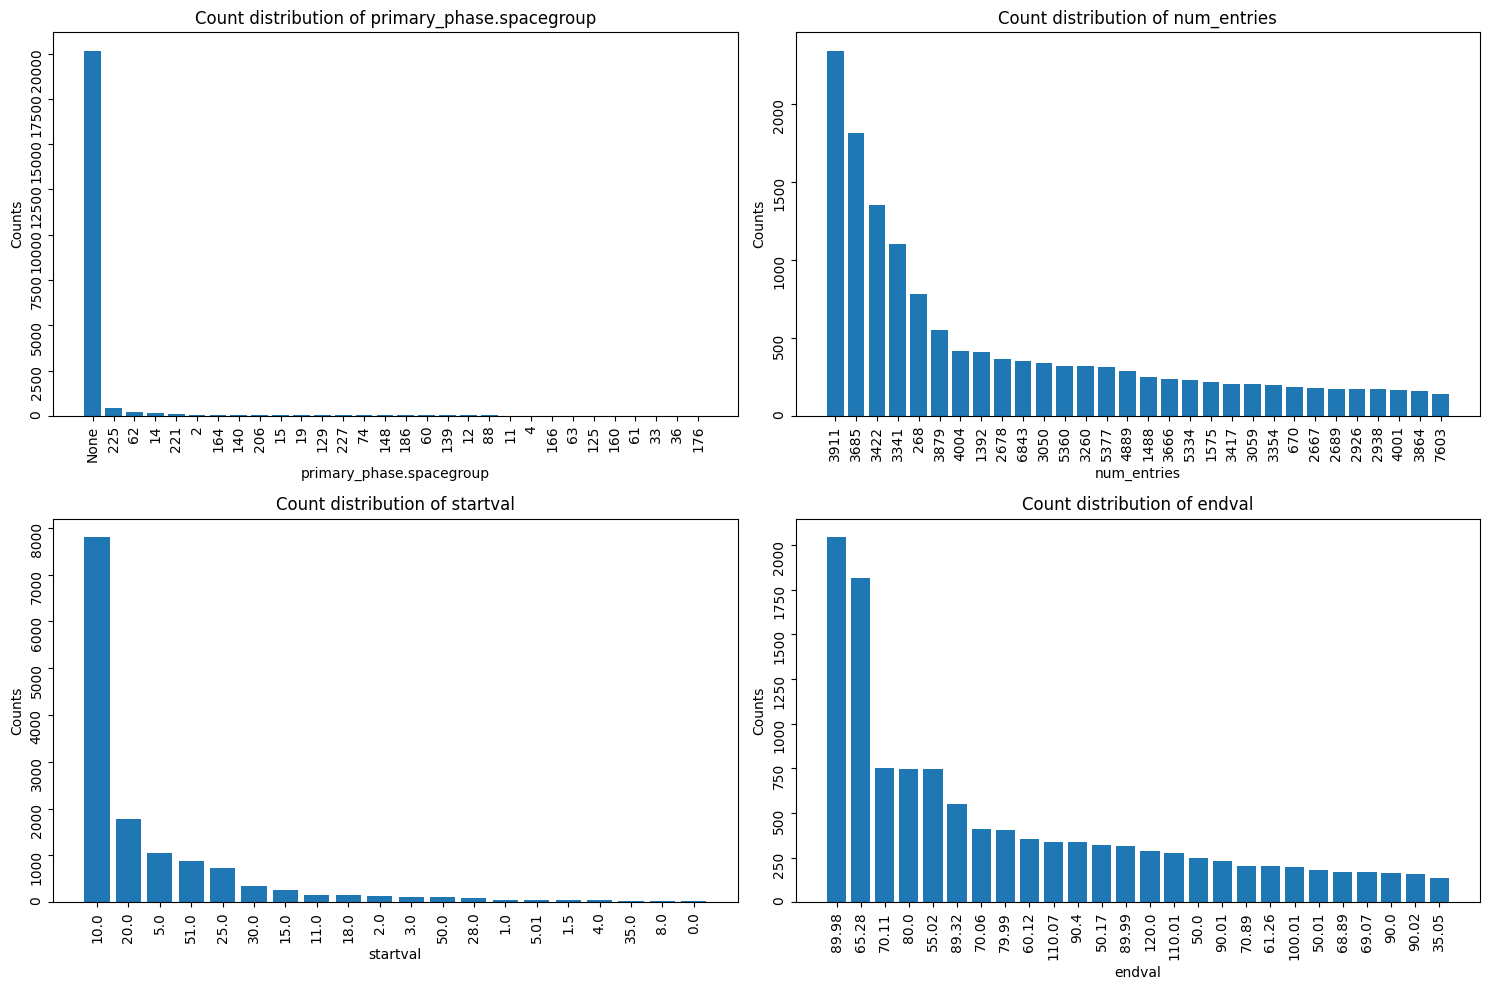

  0% (0 of 9569) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

- Loading databases from /tmp/opxrd


100% (9569 of 9569) |####################| Elapsed Time: 0:00:22 Time:  0:00:220001
100% (64 of 64) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (21 of 21) |########################| Elapsed Time: 0:00:00 Time:  0:00:0000
100% (406 of 406) |######################| Elapsed Time: 0:00:00 Time:  0:00:000000
100% (169 of 169) |######################| Elapsed Time: 0:00:00 Time:  0:00:000000
100% (169 of 169) |######################| Elapsed Time: 0:00:00 Time:  0:00:000000
100% (1052 of 1052) |####################| Elapsed Time: 0:00:06 Time:  0:00:060000
100% (10227 of 10227) |##################| Elapsed Time: 0:00:21 Time:  0:00:210001
100% (364 of 364) |######################| Elapsed Time: 0:00:00 Time:  0:00:000000


AttributeError: type object 'PatternDB' has no attribute 'show_label_fractions'

In [5]:
# opXRD: Show database statistics

opxrd = OpXRD.load(root_dirpath=opxrd_location)
attrs = ['primary_phase.spacegroup', 'num_entries', 'startval', 'endval']
opxrd.plot_quantity(attrs=attrs, save_fpath='/tmp/quantities_hist.png')

opxrd_dbs = OpXRD.as_database_list(root_dirpath='/tmp/opxrd')


In [ ]:
# XrdPattern: Loading individual patterns

import sys

stdout = sys.stdout
from xrdpattern.pattern import XrdPattern
from xrdpattern.examples import DataExamples
pattern = XrdPattern.load(fpath=DataExamples.get_aimat_fpath())

sys.stdout = stdout

In [ ]:
#XrdPattern: Standardize

x1,y1, = pattern.get_pattern_data(apply_standardization=True)
print(f'Minimum, maximum value of y = {min(y1)}, {max(y1)}')
print(f'Two theta values start, end at {x1[0]}, {x1[-1]}')

In [ ]:
# XrdPattern: Plot patterns
import matplotlib.pyplot as plt

a1, i1 = pattern.get_pattern_data(apply_standardization=False)
a2, i2 = pattern.get_pattern_data(apply_standardization=True)
a3, i3 = pattern.get_pattern_data(apply_standardization=True, apply_constant_padding=True)

plt.figure(figsize=(15, 5))
titles = ['Without Standardization', 'With Standardization', 'With Standardization and Constant Padding']
data = [(a1, i1), (a2, i2), (a3, i3)]

for idx, (angles, intensities) in enumerate(data):
    plt.subplot(1, 3, idx + 1)
    plt.plot(angles, intensities, label=titles[idx])
    plt.title(titles[idx])
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Intensity')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# XrdPattern: To tensor (Coming soon!)
#import torch
#pattern.to_tensorpair(dtype=torch.float32, device=torch.device('cuda'))